In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import math
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [16]:
# local path the file is not relative humidity but 2m dewpoint temperature

local_path_mac ='/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/Curnagl/ERA5_1990_2m_dewpoint_temperature.nc'
local_path_win =r"C:\Users\fabau\myCloud\Unil\Master\Thesis\Datasets\Curnagl\ERA5_1990_2m_dewpoint_temperature.nc"
#gusts = xr.open_dataset('Reanalysis/gust/*.nc')

servor_path = '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/ERA5/fabien2/ERA5/ERA5_1990_relative_humidity.nc'

relative_humidity = xr.open_dataset(local_path_win)

In [17]:
relative_humidity.longitude
relative_humidity['longitude'] = relative_humidity['longitude'].where(relative_humidity['longitude'] >= 0, relative_humidity['longitude'] + 360)
relative_humidity['d2m']=relative_humidity['d2m']-273.15

In [24]:
# --> make a function
tracks_path_servor = '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/WS_fabien/storms_dates.txt'
tracks_path_local_mac = '/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/storms_dates.txt'
tracks_path_local_win = r"C:\Users\fabau\myCloud\Unil\Master\Thesis\Datasets\storms_dates.txt"
tracks_path_gh = 'tracks.ipynb'

tracks = pd.read_csv(tracks_path_local_win, sep='\t', header=None)
#tracks = tracks.drop([0])

# name each column of the tracks dataframe

tracks.columns = ['year', 'monthdayhour', 'month', 'day', 'event','lon', 'lat', 'total_storms', 'long_dates']

#lon = tracks[5, 0:11]
#lon= np.array(tracks[5])
'''lon = tracks['lon'][1:63].to_numpy()
lonx = [float(obj.replace(',','.')) for obj in lon]
lat = tracks['lat'][1:63].to_numpy()
latx = np.array([float(obj.replace(',','.')) for obj in lat])'''

"lon = tracks['lon'][1:63].to_numpy()\nlonx = [float(obj.replace(',','.')) for obj in lon]\nlat = tracks['lat'][1:63].to_numpy()\nlatx = np.array([float(obj.replace(',','.')) for obj in lat])"

In [5]:
# second storm NOT WORKING

lon = tracks['lon'][63:115].to_numpy()
lonx = [float(obj.replace(',','.')) for obj in lon]
lat = tracks['lat'][63:115].to_numpy()
latx = np.array([float(obj.replace(',','.')) for obj in lat])

In [5]:
# square --> make a function

pos = arr = np.stack((lonx, latx), axis=-1)

tc_irad = np.empty((len(pos), 4))
tc_irad[:,0]=pos[:,0]-4
tc_irad[:,1]=pos[:,0]+4
tc_irad[:,2]=pos[:,1]-4
tc_irad[:,3]=pos[:,1]+4

tc_irad [tc_irad < 0] += 360

In [7]:
'''first_20.sel(longitude=slice(335,345))'''

'first_20.sel(longitude=slice(335,345))'

In [25]:
# start and end of each storm

# Initialize lists to store start and end dates for each storm
start_dates = []
end_dates = []

# Flag to determine if the storm has started
storm_started = False
start_date = None

for i in range(len(tracks)):
    if tracks['event'][i] == 'FAUX':
        if not storm_started:  # Start of a storm
            start_date = tracks['long_dates'][i]
            storm_started = True
        else:  # End of a storm
            end_dates.append(tracks['long_dates'][i - 1])
            start_dates.append(start_date)
            start_date = tracks['long_dates'][i]
    elif storm_started and i == len(tracks) - 1:  # Last event in the storm
        end_dates.append(tracks['long_dates'][i])
        start_dates.append(start_date)

# Create a new DataFrame to store start and end dates for each storm
temp = {'start_date': start_dates, 'end_date': end_dates}
storms_start_end = pd.DataFrame(temp)

# to check if it worked, the column 'total_storms' should be equal to the number of rows in the dataframe

print(tracks['total_storms'][1], len(storms_start_end))

'''start = tracks[0,8]
end = tracks[63,8]
first_storm = relative_humidity.sel(time=slice(start,end))
LONE, LONW, LATN, LATS = tc_irad[0,:]
print(tc_irad)
'''
#first_storm = first_storm.sel(latitude=slice(LATS,LATN), longitude=slice(LONE,LONW))

96 96


'start = tracks[0,8]\nend = tracks[63,8]\nfirst_storm = relative_humidity.sel(time=slice(start,end))\nLONE, LONW, LATN, LATS = tc_irad[0,:]\nprint(tc_irad)\n'

In [9]:
'''first_storm.sel(latitude=slice(90,0))''' # order matters !

'first_storm.sel(latitude=slice(90,0))'

In [33]:
'''# Let's automate the extraction of each lon and lat of every storm

storm_data = {}

for i in range(len(storms_start_end)):
    start_date = storms_start_end['start_date'][i]
    end_date = storms_start_end['end_date'][i]

    # Find the index of the start and end dates in the tracks DataFrame
    start_index = tracks.index[tracks['long_dates'] == start_date].tolist()
    end_index = tracks.index[tracks['long_dates'] == end_date].tolist()

    if start_index and end_index:
        # Extract lon and lat for the storm using the found indices
        lon_i = tracks['lon'].iloc[start_index[0]:end_index[0] + 1].to_numpy()
        lat_i = tracks['lat'].iloc[start_index[0]:end_index[0] + 1].to_numpy()
        lonx_i = [float(obj.replace(',','.')) for obj in lon_i]
        latx_i = [float(obj.replace(',','.')) for obj in lat_i]

    # Store lon_i and lat_i in the dictionary
        #storm_data[f'lon_{i+1}'] = lon_i
        #storm_data[f'lat_{i+1}'] = lat_i
        storm_data[f'lonx_{i+1}'] = lonx_i
        storm_data[f'latx_{i+1}'] = latx_i

# Access the stored values dynamically
for j in range(1, len(storm_data) + 1):
    #lon_variable_name = f'lon_{j}'
    #lat_variable_name = f'lat_{j}'
    latx_variable_name = f'latx_{j}'
    lonx_variable_name = f'lonx_{j}'

    #lon_value = storm_data.get(lon_variable_name, None)
    #lat_value = storm_data.get(lat_variable_name, None)
    lonx_value = storm_data.get(lonx_variable_name, None)
    latx_value = storm_data.get(latx_variable_name, None)

    # Print or use the stored values as needed
    #print(lon_variable_name, lon_value)
    #print(lat_variable_name, lat_value)
    #print("\n")

''''''lon = tracks['lon'][1:63].to_numpy()
lonx = [float(obj.replace(',','.')) for obj in lon]
lat = tracks['lat'][1:63].to_numpy()
latx = np.array([float(obj.replace(',','.')) for obj in lat])''''''

"lon = tracks['lon'][1:63].to_numpy()\nlonx = [float(obj.replace(',','.')) for obj in lon]\nlat = tracks['lat'][1:63].to_numpy()\nlatx = np.array([float(obj.replace(',','.')) for obj in lat])"

In [29]:
lon_list = []
lat_list = []

for i in range(len(storms_start_end)):
    start_date = storms_start_end['start_date'][i]
    end_date = storms_start_end['end_date'][i]

    # Find the index of the start and end dates in the tracks DataFrame
    start_index = tracks.index[(tracks['long_dates'] == start_date) & (tracks['event'] == 'FAUX')].tolist()
    #end_index = tracks.index[(tracks['long_dates'] == end_date) & (tracks['event'].shift(+1) != 'FAUX')].tolist()
    end_index = tracks.index[(tracks['long_dates'] == end_date) & (tracks['event'] == 'FIN')].tolist()

    if start_index and end_index:
        # Extract lon and lat for the storm using the found indices
        lon_i = tracks['lon'].iloc[start_index[0]:end_index[0] + 1].to_numpy()
        lat_i = tracks['lat'].iloc[start_index[0]:end_index[0] + 1].to_numpy()

        # Convert lon and lat values to floats and replace commas with dots
        lonx_i = [float(obj.replace(',', '.')) for obj in lon_i]
        latx_i = [float(obj.replace(',', '.')) for obj in lat_i]

        # Append lon and lat values to the lists
        lon_list.append(lonx_i)
        lat_list.append(latx_i)

# Access the stored values
for j in range(len(lon_list)):
    lon_variable_name = f'lon_{j + 1}'
    lat_variable_name = f'lat_{j + 1}'

    lon_value = lon_list[j]
    lat_value = lat_list[j]

    # Print or use the stored values as needed
    print(lon_variable_name, lon_value)
    print(lat_variable_name, lat_value)
    print("\n")


lon_1 [288.910889, 293.195404, 297.022125, 300.948608, 304.610657, 308.032532, 311.525208, 315.441956, 319.424652, 323.65451, 328.385986, 333.983643, 338.550537, 342.319214, 345.381348, 347.481354, 348.955505, 349.642426, 349.693695, 349.61145, 349.085846, 347.966858, 346.738892, 345.792297, 344.685577, 343.98587, 343.616211, 343.573486, 343.444611, 343.254211, 342.67276, 342.009674, 340.333374, 338.16507, 337.026581, 336.486816, 336.641907, 337.001831, 337.352783, 337.849609, 338.004578, 338.662262, 339.791138, 341.671143, 343.122467, 343.889618, 344.765076, 345.477539, 346.371155, 350.525635, 350.603516, 352.2258, 351.652893, 352.075134, 352.486237, 352.718658, 352.459442, 352.344513, 352.226166, 352.522858, 352.417542, 353.478241]
lat_1 [41.708939, 41.979839, 42.648212, 43.774544, 45.219181, 46.44455, 47.063492, 48.108612, 48.939552, 49.740711, 50.742744, 52.367657, 54.163193, 56.081779, 57.61256, 59.430359, 60.906483, 62.511345, 63.578465, 64.648735, 65.384789, 65.905014, 66.140305

In [46]:
lonx_1 = storm_data['lonx_96']
latx_1 = storm_data['latx_96']

In [9]:
# plotting each tracks
for i in range(len(lon_list)):
    fig, ax = plt.subplots()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.set_xlim(-180, 180)
    ax.set_ylim(0, 90)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Storm {i + 1} - Date: {storms_start_end.iloc[i]["start_date"]}')

    # Initialize an empty scatter plot for the animation
    scatter = ax.scatter([], [], color='red', s=10)

    # Function to update the scatter plot in each frame of the animation
    def update(frame):
        scatter.set_offsets(list(zip(lon_list[i][:frame + 1], lat_list[i][:frame + 1])))

    # Create the animation
    animation = FuncAnimation(fig, update, frames=len(lon_list[i]), interval=200, blit=False)

    # Save each animation as a separate GIF
    animation_file = f'storm_{i + 1}_animation.gif'
    animation.save(animation_file, writer='pillow')
    print(f"Saved animation: {animation_file}")

    # Close the figure to free up resources
    plt.close(fig)

# Show the animations (optional)
plt.show()

Saved animation: storm_1_animation.gif
Saved animation: storm_2_animation.gif
Saved animation: storm_3_animation.gif
Saved animation: storm_4_animation.gif
Saved animation: storm_5_animation.gif
Saved animation: storm_6_animation.gif
Saved animation: storm_7_animation.gif
Saved animation: storm_8_animation.gif
Saved animation: storm_9_animation.gif
Saved animation: storm_10_animation.gif
Saved animation: storm_11_animation.gif
Saved animation: storm_12_animation.gif
Saved animation: storm_13_animation.gif
Saved animation: storm_14_animation.gif
Saved animation: storm_15_animation.gif
Saved animation: storm_16_animation.gif
Saved animation: storm_17_animation.gif
Saved animation: storm_18_animation.gif
Saved animation: storm_19_animation.gif
Saved animation: storm_20_animation.gif
Saved animation: storm_21_animation.gif
Saved animation: storm_22_animation.gif
Saved animation: storm_23_animation.gif
Saved animation: storm_24_animation.gif
Saved animation: storm_25_animation.gif
Saved ani

In [34]:
# create the square around the storm automatically

square_storm_dataset = []

# Iterate through each storm track
for i, (lonx, latx) in enumerate(zip(lon_list, lat_list), 1):
    # Create a temporary array for the current storm track
    pos = np.column_stack((lonx, latx))
    
    # Create a square surrounding points for the current storm track
    tc_irad = np.empty((len(pos), 4))
    tc_irad[:, 0] = pos[:, 0] - 4
    tc_irad[:, 1] = pos[:, 0] + 4
    tc_irad[:, 2] = pos[:, 1] - 4
    tc_irad[:, 3] = pos[:, 1] + 4
    
    # Ensure values are within the range [0, 360)
    tc_irad[tc_irad < 0] += 360
    
    # Create an xarray dataset for the current storm track
    tc_irad = xr.Dataset(
        {'tc_irad': (['point', 'coordinate'], tc_irad)},
        coords={'point': np.arange(len(pos)), 'coordinate': np.arange(4)}
    )
    
    # Add storm dataset to the list
    square_storm_dataset.append(tc_irad)

# Combine individual storm datasets into a single dataset
combined_square_storm_dataset = xr.concat(square_storm_dataset, dim='storm')

# Save the combined dataset to a NetCDF file
combined_square_storm_dataset.to_netcdf('combined_square_storm_dataset.nc')

In [15]:
n_time = len(first_storm.time)
'''minLAT = 38.657398
minLON = 350
maxLAT = 60.181171
maxLON = 40

print(maxLAT, minLAT, maxLON, minLON)'''

'minLAT = 38.657398\nminLON = 350\nmaxLAT = 60.181171\nmaxLON = 40\n\nprint(maxLAT, minLAT, maxLON, minLON)'

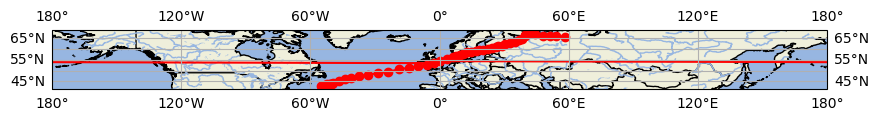

In [16]:
# show the track of the storm on the map

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

'''it_min = 19
it_max = 20'''

# plot the longitude and latitude of the storm
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

#ax.set_extent([minLON, maxLON, minLAT, maxLAT])

ax.plot(lonx, latx, color='red', marker='o', transform=ccrs.PlateCarree())

IndexError: index 52 is out of bounds for axis 0 with size 52

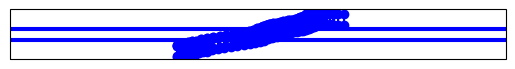

In [17]:
# plot the 62 squares around the storm and plot it on the map
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

for i in range(n_time):
    LONE, LONW, LATN, LATS = tc_irad[i, :]
    ax.plot([LONE, LONE, LONW, LONW, LONE], [LATS, LATN, LATN, LATS, LATS], color='blue', marker='o', transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
plt.show()

[301.020905, 38.657398, 62.181171, 69.525337]
2.0134350000000003 38.657398 361.285187 71.417984
[2.0134350000000003, 38.657398, 361.285187, 71.417984]


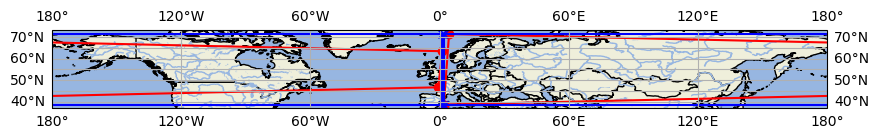

In [18]:
print([tc_irad[0,0], tc_irad[0,2], tc_irad[-1,1], tc_irad[-1,3]])
print(min(tc_irad[:,0]), min(tc_irad[:,2]), max(tc_irad[:,1]), max(tc_irad[:,3]))

# plot min and max longitudes and latitudes of the storm

plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

ax.plot([min(tc_irad[:,0]), max(tc_irad[:,0]), max(tc_irad[:,1]), min(tc_irad[:,1]), min(tc_irad[:,0])], [min(tc_irad[:,2]), min(tc_irad[:,3]), max(tc_irad[:,2]), max(tc_irad[:,3]), min(tc_irad[:,2])], color='red', marker='o', transform=ccrs.PlateCarree())
ax.plot([min(tc_irad[:,0]), max(tc_irad[:,1]), max(tc_irad[:,1]), min(tc_irad[:,0]), min(tc_irad[:,0])], [min(tc_irad[:,2]), min(tc_irad[:,2]), max(tc_irad[:,3]), max(tc_irad[:,3]), min(tc_irad[:,2])], color='blue', marker='x', transform=ccrs.PlateCarree())

# extend of this storm is the following :

print([min(tc_irad[:,0]), min(tc_irad[:,2]), max(tc_irad[:,1]), max(tc_irad[:,3])])
minLAT = min(tc_irad[:,2])
minLON = min(tc_irad[:,0])
maxLAT = max(tc_irad[:,3])
maxLON = max(tc_irad[:,1])

RminLAT = math.floor(min(tc_irad[:,2]))
RminLON = math.floor(min(tc_irad[:,0]))
RmaxLAT = math.ceil(max(tc_irad[:,3]))
RmaxLON = math.ceil(max(tc_irad[:,1]))

In [ ]:
# make a gif of the storm and the 62 squares around it

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
ax.set_extent([minLON, maxLON, minLAT, maxLAT])
ax.plot()

def animate(i):
    LONE, LONW, LATN, LATS = tc_irad[i, :]
    ax.plot([LONE, LONE, LONW, LONW, LONE], [LATS, LATN, LATN, LATS, LATS], color='blue', marker='o', transform=ccrs.PlateCarree())
    ax.plot(lonx[i], latx[i], color='red', marker='o', transform=ccrs.PlateCarree())
    return ax

anim = FuncAnimation(fig, animate, frames=n_time, interval=200)
anim.save('storm_01_90_2.gif', dpi=80, writer='imagemagick')


In [19]:
# slice the first_storm dataset with the min and max longitudes and latitudes of the storm

first_storm = relative_humidity.sel(time=slice(storms_start_end['start_date'][0],storms_start_end['end_date'][0]))
first_storm = first_storm.sel(latitude=slice(RmaxLAT,RminLAT), longitude=slice(RminLON,RmaxLON))
first_storm

<xarray.Dataset>
Dimensions:    (longitude: 1432, latitude: 137, time: 62)
Coordinates:
  * longitude  (longitude) float32 2.0 2.25 2.5 2.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 72.0 71.75 71.5 71.25 ... 38.5 38.25 38.0
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 1.97 2.055 ... 11.41 11.22
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [20]:
# Create empty lists to store sliced data
sliced_data = []

# Loop through each time step
for i in range(len(lon)):
    # Get the cyclone's coordinates at the current time step
    cyclone_lon = lonx[i]
    cyclone_lat = latx[i]

    # Slice the variable data using the cyclone's coordinates at this time step
    variable_at_cyclone = first_storm['d2m'].sel(latitude=cyclone_lat, longitude=cyclone_lon, method='nearest')

    # Append the sliced data to the list
    sliced_data.append(variable_at_cyclone)

# Combine the sliced data into a new xarray dataset
sliced_dataset = xr.concat(sliced_data, dim='time')

In [23]:
sliced_dataset

<xarray.DataArray 'd2m' (time: 3224)>
array([-2.8833313 ,  0.60665894,  3.787323  , ..., -5.909363  ,
       -5.0799255 , -2.7954407 ], dtype=float32)
Coordinates:
    longitude  (time) float32 305.0 305.0 305.0 305.0 ... 58.25 58.25 58.25
    latitude   (time) float32 42.75 42.75 42.75 42.75 ... 65.5 65.5 65.5 65.5
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00

AttributeError: 'DataArray' object has no attribute 'd2m'

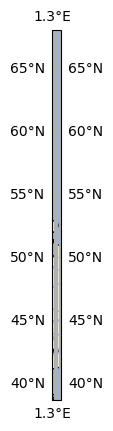

In [22]:
# plot the d2m variable at time step 0 over the limits of the storm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
ax.set_extent([minLON, maxLON, minLAT, RmaxLAT-4])

#first_storm.d2m[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-40, vmax=25)
sliced_dataset.d2m[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=-40, vmax=25)

In [ ]:
n_time = len(first_storm.time)

In [ ]:
# plot the d2m variable for each time step over the limits of the storm

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
ax.set_extent([minLON, maxLON, minLAT, maxLAT])
ax.plot()

def animate(i):
    LONE, LONW, LATN, LATS = tc_irad[i, :]
    ax.plot([LONE, LONE, LONW, LONW, LONE], [LATS, LATN, LATN, LATS, LATS], color='blue', marker='o', transform=ccrs.PlateCarree())
    ax.plot(lonx[i], latx[i], color='red', marker='o', transform=ccrs.PlateCarree())

    plt.contourf(first_storm.longitude, first_storm.latitude, first_storm['d2m'].isel(time=i), cmap='coolwarm')

    cbar = plt.colorbar()
    cbar.set_label('Temperature (d2m)')  # Set the colorbar label
    cbar.set_clim(-40, 25)  # Set the color limits for the colorbar

    return ax

anim = FuncAnimation(fig, animate, frames=n_time, interval=200)
anim.save('storm_01_90_d2m.gif', dpi=80, writer='imagemagick')